0. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading the dataset

Loading the dataset and presenting information and the first rows of the dataset:

In [ ]:
titanic_data = sns.load_dataset('titanic')
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Data preprocessing

2.1. Removing the following unnecessary columns and presenting the dataset with the following removals:

- **class:** The pclass column already shows the passenger class with numeric values, which is simpler than categorical values;
- **embarked_town:** The embarked column already shows the port of embarkation with simpler categorical values;
- **alive:** The survived column already answers whether the passenger survived with numeric values, which is simpler than categorical values;
- **alone:** The sibsp/parch columns already detail whether the passenger traveled with other people;
- **who/adult_male:** The sex/age columns already detail the sex and age of the passengers, making it redundant to have columns to identify whether they are male, female, or a child, and whether they are an adult.

In [ ]:
titanic_data.drop(columns=['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    str     
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    str     
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), str(2)
memory usage: 57.0 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


2.2. Determining the percentage of null values ​​in the columns:

In [ ]:
(titanic_data.isnull().sum() / len(titanic_data)) * 100

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
deck        77.216611
dtype: float64

In [ ]:
mean = titanic_data["age"].mean()
median = titanic_data["age"].median()
dif = (abs(mean-median)/median)*100
print(f"{dif}")

6.0682773109243575


- **age:** The age column showed null values ​​(less than 90%). To choose between the mean and median, I calculated the difference. If the difference between the mean and the median represented less than 5% of the median value, since it represented more, I opted to replace the null values ​​with the median.
- **embarked:** The embarked column showed null values. Since they are less than 20%, I opted to replace the null values ​​with the mode.
- **deck:** The deck column showed well over 50% null values, therefore, I opted to remove the column.

In [ ]:
titanic_data["age"] = titanic_data["age"].fillna(median)
titanic_data["embarked"] = titanic_data["embarked"].fillna(titanic_data["embarked"].mode()[0])
titanic_data = titanic_data.drop('deck', axis=1)

In [ ]:
print((titanic_data.isnull().sum() / len(titanic_data)) * 100)
titanic_data.head()

survived    0.0
pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
dtype: float64


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


2.3. Checking for outliers in the continuous numeric columns age, sibsp, parch, and fare:

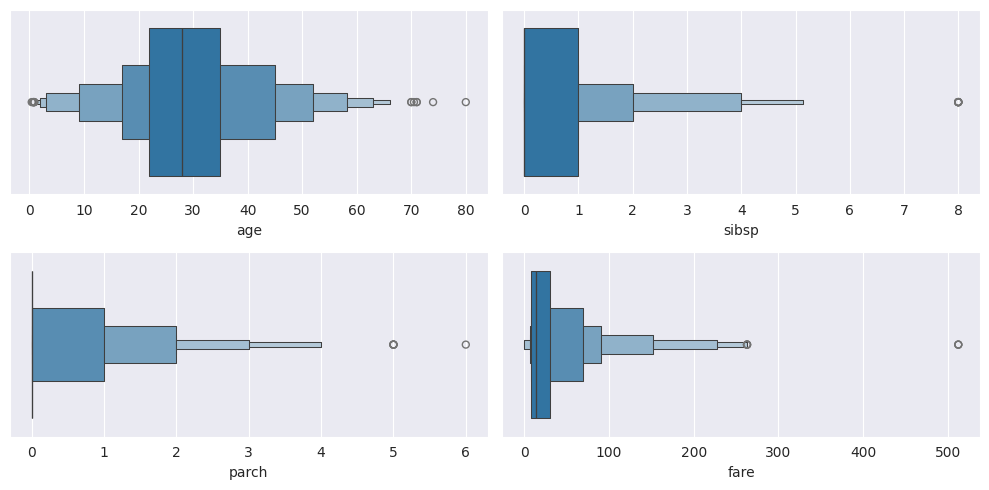

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))

cols = ['age', 'sibsp', 'parch', 'fare']
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x=titanic_data[cols[i]])

plt.tight_layout()

I deemed the outliers relevant to the analysis, therefore I did not remove them.

In [ ]:
print((titanic_data.loc[titanic_data['fare']==titanic_data['fare'].max()])[['pclass', 'fare']].to_string(index=False))

 pclass     fare
      1 512.3292
      1 512.3292
      1 512.3292


Before proceeding, I checked the relationship between the fare and class to see if the high value represented any error, and, since all three occurrences of the value represented people from the first class, I deemed it prudent to keep the outliers.

2.4. Presenting the basic statistics for the columns:

In [ ]:
cols = ['age', 'sibsp', 'parch', 'fare']
resume_num = titanic_data[cols].describe().T
resume_num['cv'] = (resume_num['std']/resume_num['mean'])*100
print(resume_num.T)

              age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582    0.523008    0.381594   32.204208
std     13.019697    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200
cv      44.342625  210.846437  211.234407  154.307253


In [ ]:
cols = ['survived', 'pclass', 'sex', 'embarked']

print(f'Frequency:\n')
for i in range(4):
    print(f'{titanic_data[cols[i]].value_counts(normalize=True)*100}\n') #normalize faz a frequência ser relativa (%)

Frequência de cada valor:

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64



- **survived:** Only approximately 38.38% of passengers managed to survive;
- **pclass:** The vast majority of passengers were third class (approx. 51.11%), representing more than the sum of first class (approx. 24.24%) and second class (approx. 20.65%) passengers;
- **sex:** Approx. 64.76% of passengers were male;
- **age:** The average for this variable is unreliable. At least 75% of passengers were between 0.42 (5.04 months) and 35 years old, while the highest value is 80, showing a growing discrepancy, which implies an unreliable average;
- **sibsp:** The average for this variable is unreliable. At least 75% of passengers had between 0 and 1 spouse/siblings, while the highest value is 8, showing a growing discrepancy, which implies an unreliable average;
- **parch:** The average for this variable is unreliable. At least 75% of passengers had 0 parents/children, while the highest value is 6, showing a growing discrepancy, which implies an unreliable average;
- **fare:** The average for this variable is unreliable. At least 75% of passengers paid between £0 and £31, while the highest value was approximately £512.33, showing an extremely high growing discrepancy in the amount some passengers paid, which implies an unreliable average;
- **embarked:** The vast majority (approx. 72.50%) embarked at the port of Southampton.

3. Data Transformation

- The columns present in the dataset already tell the story of the customers well, therefore I did not use feature engineering;
- There was no need for standardization or normalization, as no machine learning algorithm will be used.

4. Data mining

4.1. Performing a univariate analysis of all columns except the target "survived," as I considered them potentially important, thus making them key columns:

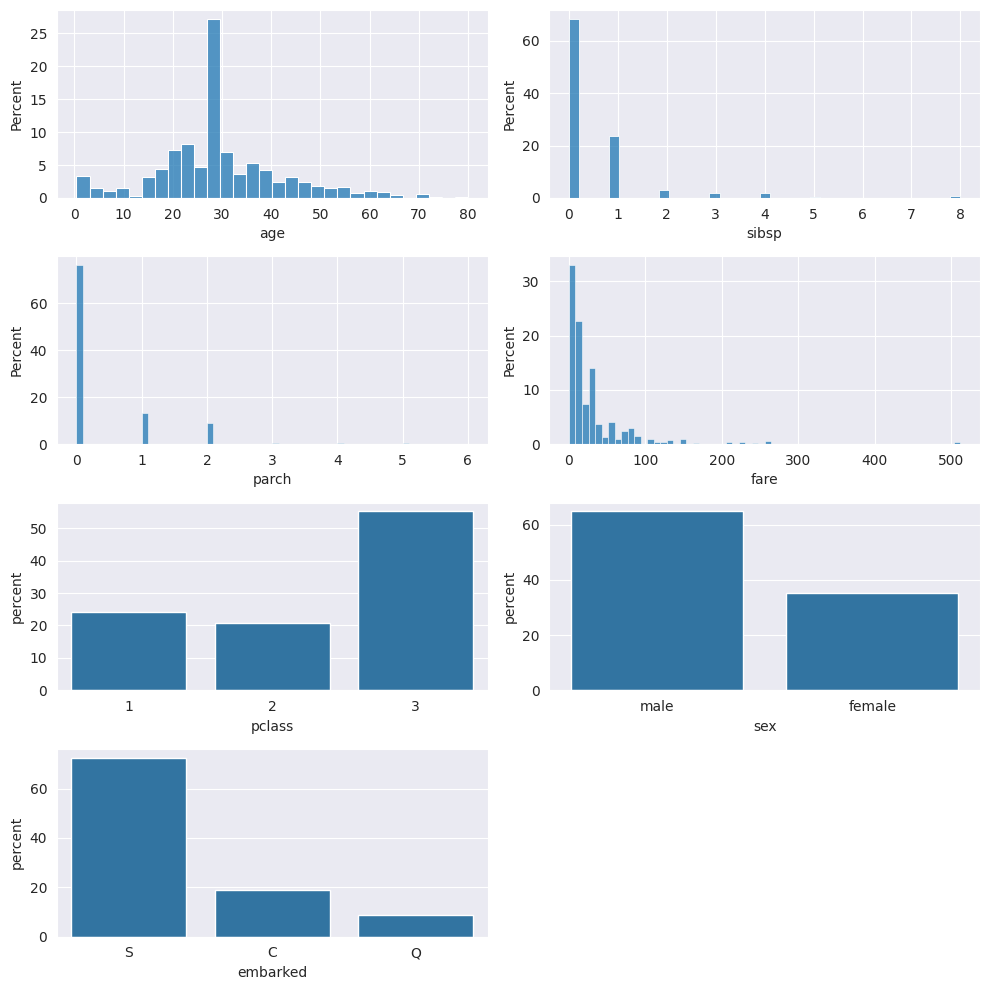

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))

cols = ['age', 'sibsp', 'parch', 'fare', 'pclass', 'sex', 'embarked']
for i in range(7):
    plt.subplot(4, 2, i+1)
    if i<=3:
        sns.histplot(titanic_data[cols[i]], stat='percent')
    else:
        sns.countplot(data=titanic_data, x=cols[i], stat='percent')

plt.tight_layout()

- **age:** Asymmetrical distribution with several peaks, the largest being between values ​​close to 30 years; the histogram shows that the completeness of ages is enormous, from babies a few months old (a significant peak) to seniors of 80 years, with the largest age peaks being between 20 and 40 years;
- **sibsp:** Right-skewed distribution (with minor exceptions), with the vast majority of passengers having a smaller number (0) of siblings/spouse on the ship, but some having a significantly larger number;
- **patch:** Right-skewed distribution (with minor exceptions), with the vast majority of passengers having a smaller number (0) of parents/children on the ship, with some having a significantly larger number;
- **fare:** Right-skewed distribution, with the vast majority of passengers having paid a lower fare, with some having paid a much higher fare;
- **pclass:** Same interpretation as in the basic statistics, visually showing that third-class passengers represent more than the sum of first and second-class passengers who boarded;
- **sex:** Same interpretation as in the basic statistics, visually showing that the number of male passengers appears to be almost double that of female passengers;
- **embarked:** Same interpretation as in the basic statistics, visually showing that few boarded in Cherbourg and Queenstown, with boarding in Southampton representing more than the sum of those who boarded in the other locations.

I checked the variance of the columns and concluded that it was low and could be used in the bivariate analysis.

4.2. Bivariate analysis:

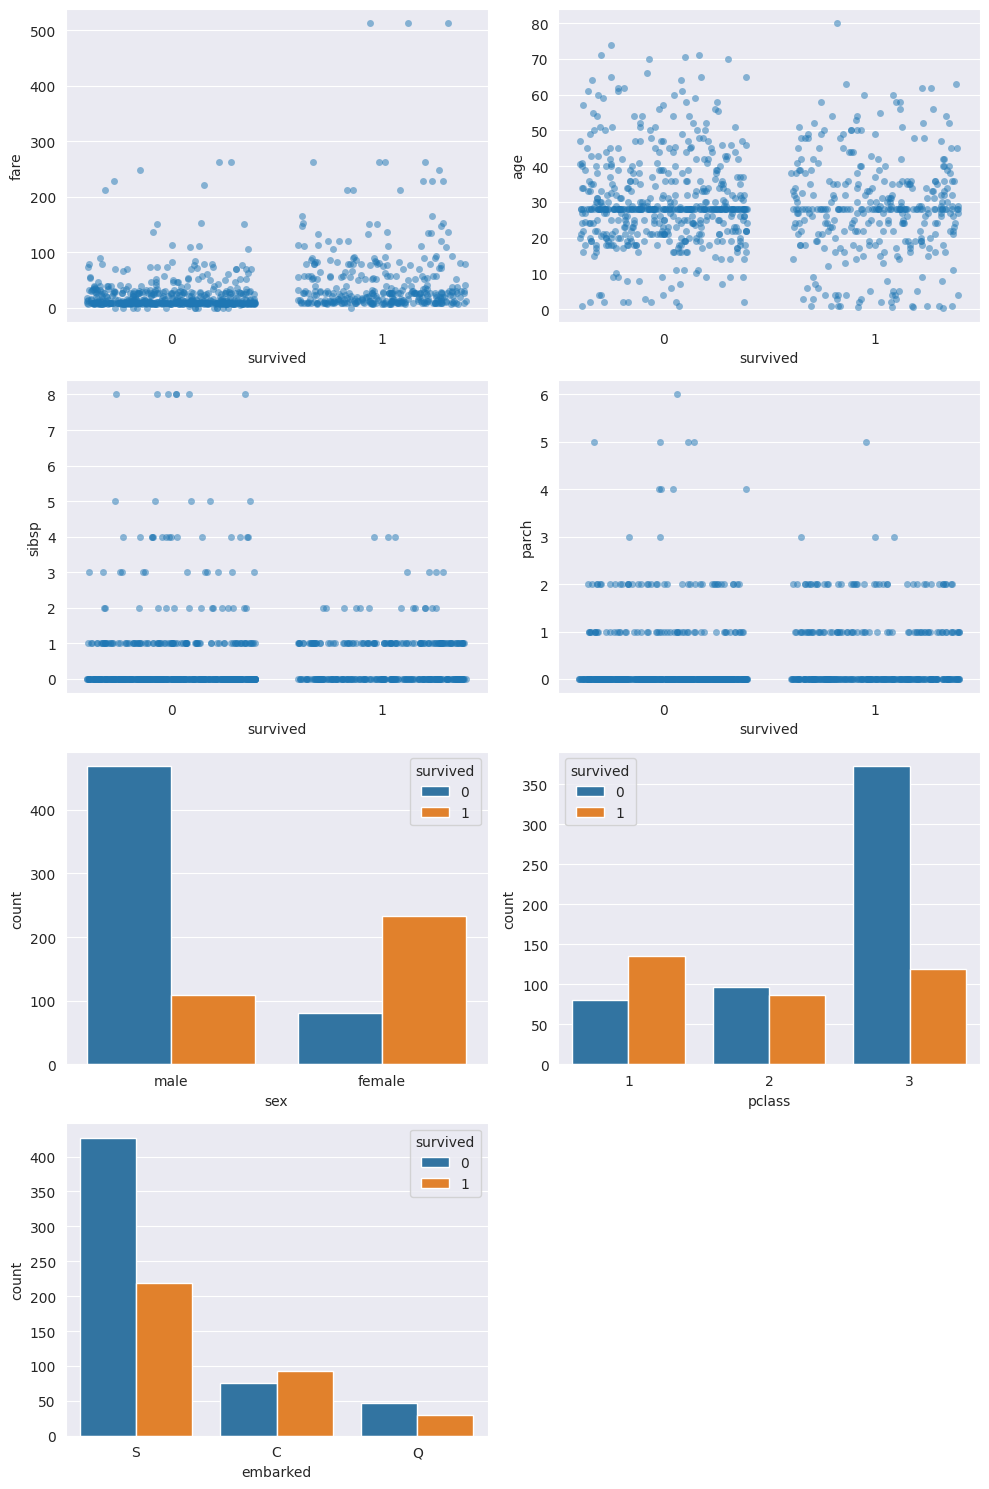

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,15))

cols = ['fare', 'age', 'sibsp', 'parch', 'sex', 'pclass', 'embarked']
for i in range(7):
    plt.subplot(4, 2, i+1)
    if i<=3:
        sns.stripplot(x=titanic_data['survived'], y=titanic_data[cols[i]],
                        jitter=0.4,
                        alpha=0.5
                      )
    else:
        sns.countplot(x=cols[i], hue='survived', data=titanic_data)

plt.tight_layout()


- **survived x fare:** The data regarding the fare of survivors and victims are very similar up to around £300, with values ​​above £500 being relevant for survivors, indicating that those who paid this higher amount managed to survive;
- **survived x age:** Very similar data, nothing relevant to affirm that age was an important factor in survival;
- **survived x sibsp:** Very similar data up to 4 siblings/spouse, having more than that was decisive in making passengers victims;
- **survived x parch:** Very similar data, there are more cases from 3 parents/children onwards, but nothing that can be affirmed as a differential in the survival rate;
- **survived x sex:** Being female was a fundamental factor for survival, while the vast majority of male passengers were victims, the number of female survivors is 2x greater than the number of victims of that sex; - **survived x pclass:** Social class was an important factor in survival; the higher the class, the lower the number of victims. First-class passengers stand out, being the only group with more survivors than victims, and third-class passengers, where the number of victims appears to be 3 times greater than the number of survivors;
- **survived x embarked:** It is noteworthy that the number of victims who boarded in Southampton appears to be double the number of those who managed to survive, while in the other two locations it is more even, without such a disparity between victims and survivors.

4.3. Performing multivariate analysis to explore the relationship between the embarkation point and other variables:

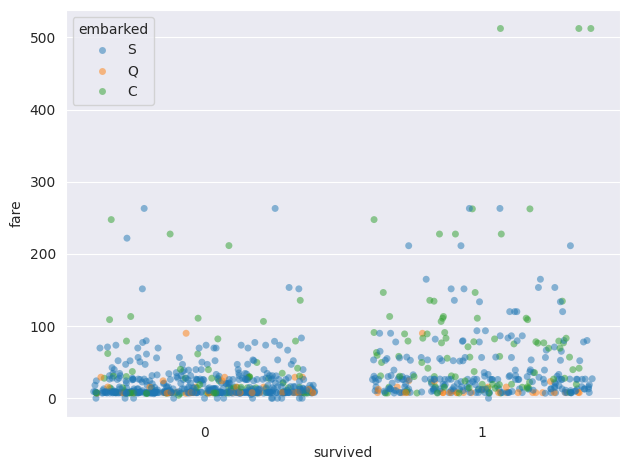

In [ ]:
sns.set_style("darkgrid")

sns.stripplot(x=titanic_data['survived'], y=titanic_data['fare'], hue=titanic_data['embarked'], 
                jitter=0.4,
                alpha=0.5
            )

plt.tight_layout()

<Figure size 1000x1500 with 0 Axes>

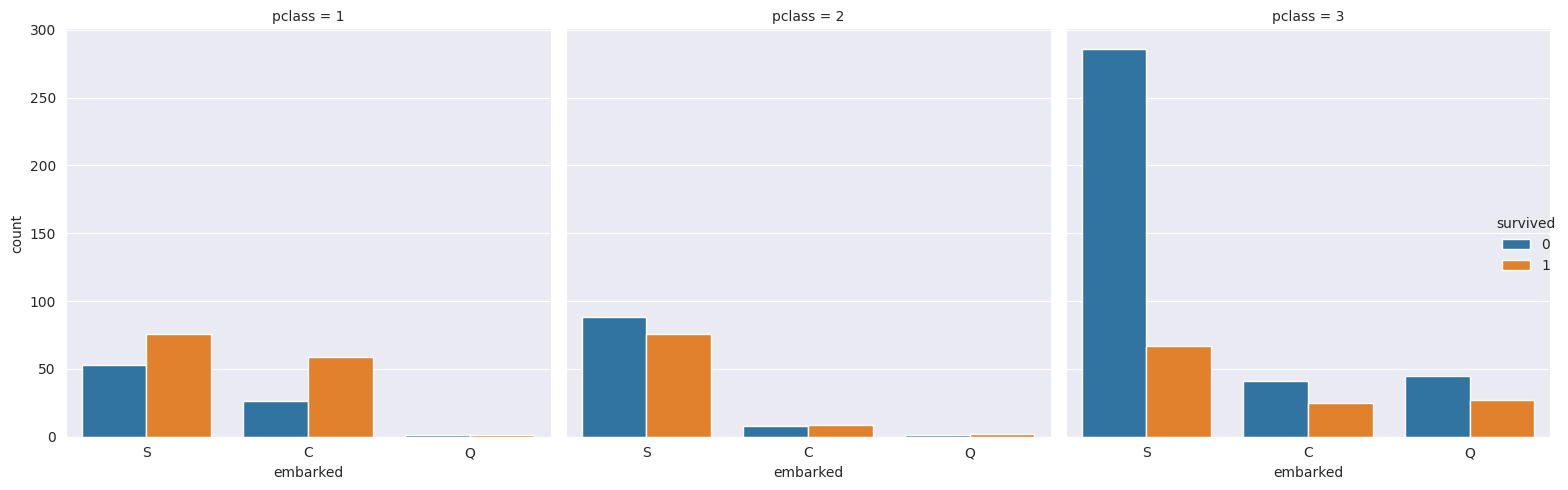

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,15))
    
sns.catplot(x='embarked', hue='survived', col='pclass', data=titanic_data, kind='count')
 
plt.tight_layout()

- **survived x embarked x fare:** The data are very similar up to £300, with values ​​above £500 being relevant for survivors, all having embarked in Cherbourg;
- **survived x embarked x pclass:** The bivariate analysis data showed that the vast majority of victims embarked in Southampton, and the multivariate data shows that the overwhelming majority of those who embarked at that port were third class.

5. Insights and Conclusions

- The main insights from this analysis were:
  * Only approximately 38.38% of passengers survived;
  * The youngest age among the passengers was 5.04 months (!!!), while the oldest was 80 years;
  * At least 75% of passengers had between 0 and 1 spouse/siblings, while the highest number was 8;
  * At least 75% of passengers had 0 parents/children, while the highest number was 6;
  * At least 75% of passengers spent between £0 and £31, while the highest amount was approximately £512.33.

- The following are the factors that most influenced survival:
  * **pclass:** The higher the class (first to third), the lower the number of victims;
  * **sex:** Being female was a fundamental factor for survival;
  * **fare:** Everyone who paid more than £300 survived;
  * **sibsp:** Having more than 4 siblings/spouse was decisive in making passengers victims;
  * **embarked:** The extra (multivariate) analysis of the embarkation location alone was not a decisive factor for survival, however the analysis showed that everyone who paid more than £300 embarked in Cherbourg and the vast majority who embarked in Southampton were third class.